<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/01_Neural_Network_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction Regression with Neural Network in TensorFlow**

There are many definitions for the regression problem but in our case, we're going to simplify it. Predicting a number based few inputs called features and label called output

More simple : Predicting a number

In [1]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-11-26 16:32:41.606834


**Creating data to view and fit**

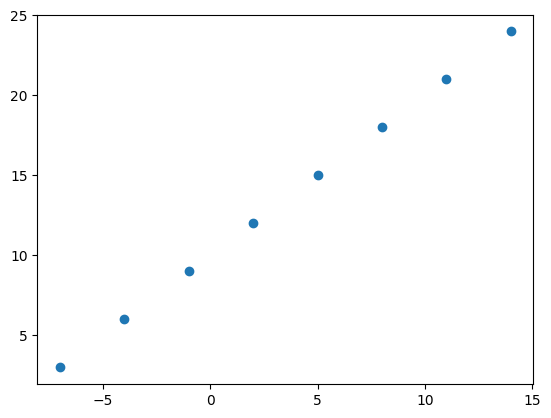

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features

X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)



In [3]:
y == X + 10 #if we closely observe the relation between above graph then we can realize as it is as true y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Input and Output Shapes**

In [4]:
#Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom", "bathroom", "garage"]) # Shape would be 3
house_price = tf.constant([939700])   # Shape would be 1
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
house_info.shape

TensorShape([3])

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
# turn our numpy arrays as tensors with dtype float32

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape    # as scalar has shape 0 it will not give us the shape
output_shape = y[0].shape   # as scalar has shape 0 it will not give us the shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

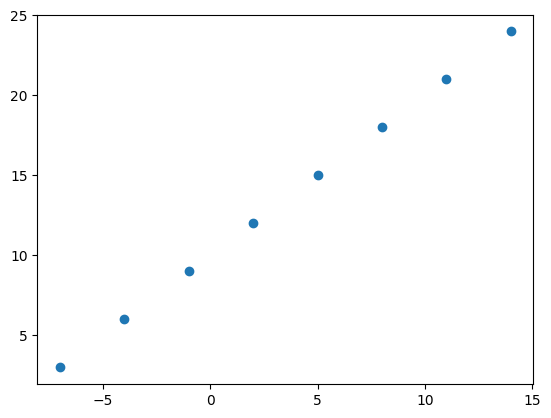

In [11]:
plt.scatter(X,y)

**Steps in modeling with TensorFlow**

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

**1.Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

**2.Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).

**3.Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 10.3827 - mae: 10.3827
Epoch 2/5
1/1 [==============================] - 0s 26ms/step - loss: 10.2502 - mae: 10.2502
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 10.1177 - mae: 10.1177
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 9.9852 - mae: 9.9852
Epoch 5/5
1/1 [==============================] - 0s 17ms/step - loss: 9.8527 - mae: 9.8527


In [13]:
# Chench the X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
#Try and make a prediction using a model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 313ms/step


array([[18.166405]], dtype=float32)

In [15]:
y_pred + 11

array([[29.166405]], dtype=float32)

**Improving the model**

We can improve our model by altering the steps we taken to create our model

1. **Creating model** : here We might add more layers, increase the number of hidden layers, chnage the activation function of each layer.

2. **Compiling a model** : Here we might change the optimization function or perhaps the **Learning rate** of the optimization function.

3. **Fitting a model** : Here we might fit a model for more **Epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [16]:

# Create a model using the Sequential API

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# in the output it would be improved for better than before by just increasing the epochs to 100 training examples

Epoch 1/100
1/1 [==============================] - 1s 683ms/step - loss: 18.0656 - mae: 18.0656
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 17.7843 - mae: 17.7843
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 17.5031 - mae: 17.5031
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 17.2218 - mae: 17.2218
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 16.9406 - mae: 16.9406
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 16.6593 - mae: 16.6593
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 16.3781 - mae: 16.3781
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 16.0968 - mae: 16.0968
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 15.8156 - mae: 15.8156
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 15.5343 - mae: 15.5343
Epoch 11/100
1/1 [==============================

In [17]:
# Reming ourselves of the data

model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[29.50011]], dtype=float32)

In [18]:
#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.1),
              metrics = ["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 850ms/step - loss: 18.7294 - mae: 18.7294
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 18.1295 - mae: 18.1295
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 17.5295 - mae: 17.5295
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 16.9295 - mae: 16.9295
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 16.3295 - mae: 16.3295
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 15.7295 - mae: 15.7295
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 15.1295 - mae: 15.1295
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 14.5295 - mae: 14.5295
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 13.9295 - mae: 13.9295
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 13.4363 - mae: 13.4363
Epoch 11/100
1/1 [==============================

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 144ms/step


array([[27.276352]], dtype=float32)

In [20]:
# Create the model with the extra layers which are hidden

#Creare a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),  # We can use any kind of activation
    #tf.keras.layers.Dense(1000, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics =["mae"])

#Fit the model
model.fit(tf.expand_dims(X, axis =-1), y, epochs = 100) # it would get more optimized after this modiciation by adding 1 more hidden layer with 100 neurons


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.7822 - mae: 13.7822
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 13.2939 - mae: 13.2939
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 12.8059 - mae: 12.8059
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 12.3155 - mae: 12.3155
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 11.8203 - mae: 11.8203
Epoch 6/100
1/1 [==============================] - 0s 54ms/step - loss: 11.3177 - mae: 11.3177
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 10.8052 - mae: 10.8052
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 10.2800 - mae: 10.2800
Epoch 9/100
1/1 [==============================] - 0s 39ms/step - loss: 9.7394 - mae: 9.7394
Epoch 10/100
1/1 [==============================] - 0s 57ms/step - loss: 9.1808 - mae: 9.1808
Epoch 11/100
1/1 [==============================] - 0s 

In [21]:
#Let's remind ourselves of the data

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [22]:
model.predict([17])

#1/1 [==============================] - 0s 37ms/step
#array([[32.63552]], dtype=float32). before this model was better than this but this is better than the initial one


1/1 [==============================] - 0s 190ms/step


array([[29.784433]], dtype=float32)

**Evaluating the Models**

1. In Practice a typical work flow u go through in building the neural networks model is : Build a model -> fit it -> evaluate it -> tweak a model. -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ......

2. When it comes to evaluation... there are 3 words you should momorize : "Visualize, visualize, visualize"

3. When it comes to building a model...u should keep in mind that u have to "Experiment Experiment and Experiment until u get the expected result"

**It's a goof idea to visualize :**

* The data -> what data are we working with ? what does it look like
* The model itself -> what does our model look like ?
* The training model -> How does the model perform while it learns ?
* The predictions of the model ->  How do the predictions of a model line up against the ground truth(Labels) ?



In [23]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [24]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

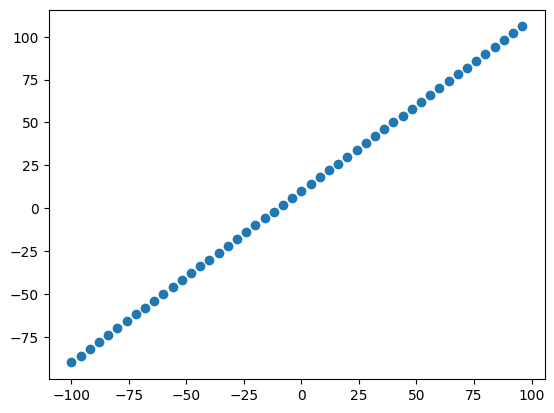

In [25]:
# Visualize the data

import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

*** Training Set** - The model learns from this data, which is typically 70 - 80% of the total data u have available

*** Validation Set** - The model gets tuned on this data, which is typically 10 - 15% of the data available

*** Test Set** - the model gets evaluated on this data to test what it has learned, this set typically 10 - 15% of the total data available.

In [26]:
## Check the length of how many data samples we have

len(X) #Usually we will have more than 100 but we have 50 as of now

50

In [27]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

**Visualizing the data**

* Now we've got our training and test data sets.. Let's visualize them again to have better understanding


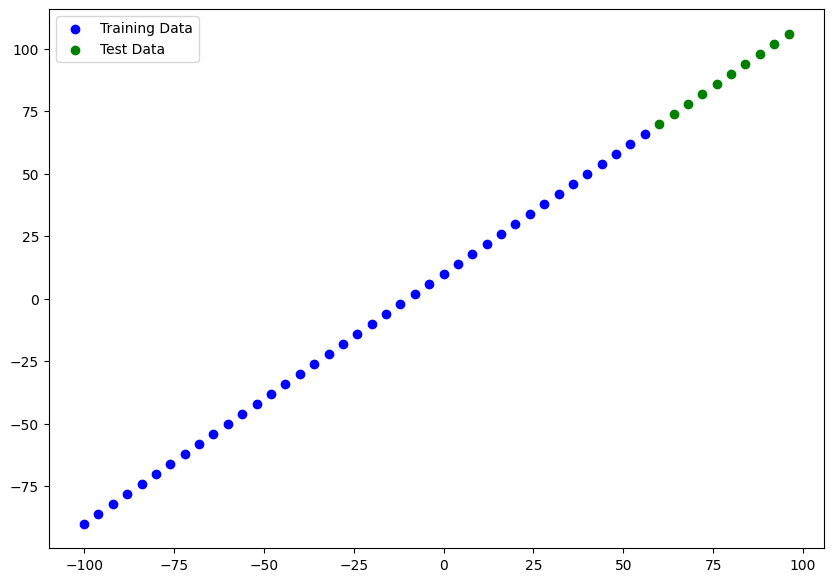

In [28]:
plt.figure(figsize=(10,7)) #

#Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training Data")  # c = "b" means color blue

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Test Data") # c = "g" means color green
plt.legend() # Gives the labels within the graph

In [29]:
# Let's have a look at how to create the neural Netwrok

#1.Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss = "mae", # or loss = tf.keras.losses.mae
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Fit the model

model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100) # can also build the models using the build() or fit()


Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 10.2692 - mae: 10.2692
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 8.1924 - mae: 8.1924
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 14.9649 - mae: 14.9649
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 8.1069 - mae: 8.1069
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.7140 - mae: 10.7140
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.9104 - mae: 9.9104
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 8.9712 - mae: 8.9712
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 9.0745 - mae: 9.0745
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 19.7621 - mae: 19.7621
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 10.6737 - mae: 10.6737
Epoch 11/100
2/2 [==============================] - 0s 8ms/

#Visualizing the model

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

#1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer")
],name ="CHENCHU_MODEL")

#2 compile the model

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#3 Fit the model





In [32]:
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**ELABORATION OF THE SUMMARY**

***Total params:** Total number of parameters in the model

 ***Trainable params:** These are the parameters (Patterns) the model can update as it trains

***Non-trainable params:** these parameters aren't updated during the training(this is typical when you bring in already learn patterns or parameters from other models during the transfer learning)

**Resource :**  For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video https://youtu.be/QDX-1M5Nj7s

**Excercise :**  Try playing with the number of hidden units in the dense layer see how that effects the number of parameters (Total and trainable ) by calling model.summary()

In [33]:
#Let's fit our model to the training the data

model.fit(X_train, y_train, epochs = 100, verbose=0) # Verbosity mode  0 = Silent 1= progress bar 2 = one line per epoch


In [34]:
# Get the model summary
model.summary()

Model: "CHENCHU_MODEL"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


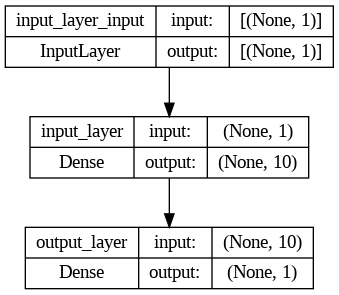

In [35]:
# We can also visualize the data using the plot_model from utils

from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

**Visualizing the model predictions**

To visualize the predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (Ground truth versus model predictions)






In [36]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred # Will print the predictions

1/1 [==============================] - 0s 62ms/step


array([[ 90.79796 ],
       [ 96.729675],
       [102.66137 ],
       [108.59308 ],
       [114.524796],
       [120.4565  ],
       [126.3882  ],
       [132.31992 ],
       [138.25162 ],
       [144.18332 ]], dtype=float32)

In [37]:
y_test # will print the ground truth labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note :** If you feel like u will use the functionality in the future it's better to make them as functions to reuse again

In [38]:

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels =y_test,
                    predictions = y_pred):

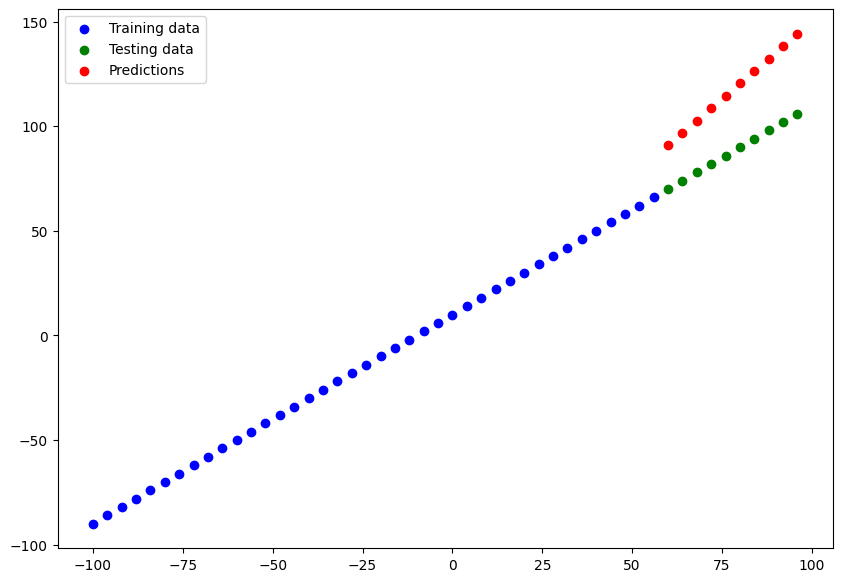

In [39]:
plot_predictions()

**Evaluation of Model Performance:**

* Evaluating our models prediction with regression evaluation metrics
* Depending on the problem that you are working on, There will be different evaluation metrics to evaluate your model's performance.
* Since you are working on a regression, two of the main metrics:
  * MAE : Mean Absolute Error (On average, how wrong is each of my model's prediction)
  * MSE : Mean Square Error, (Square Average Errors)



In [40]:
# Evaluate the model on the test s
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 161ms/step - loss: 29.4906 - mae: 29.4906


[29.490642547607422, 29.490642547607422]

In [41]:
# Calculate the Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([10.159592 , 11.8918705, 15.329096 , 20.593079 , 26.524796 ,
       32.456497 , 38.3882   , 44.319916 , 50.251617 , 56.18332  ],
      dtype=float32)>

In [42]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 90.79796 ],
       [ 96.729675],
       [102.66137 ],
       [108.59308 ],
       [114.524796],
       [120.4565  ],
       [126.3882  ],
       [132.31992 ],
       [138.25162 ],
       [144.18332 ]], dtype=float32)>

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 90.79796 ,  96.729675, 102.66137 , 108.59308 , 114.524796,
       120.4565  , 126.3882  , 132.31992 , 138.25162 , 144.18332 ],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=29.490643>

In [46]:
# Calculate the mean squeare Error

mse = tf.metrics.mean_squared_error(y_true = y_test,
                                  y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=900.4828>

In [47]:
# Make some functions to reuse the MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred = y_test)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = y_pred)



# Running Experiments to improve our model

Build model -> fit it -> Evaluate it -> tweak it -> fit it -> Evaluate it -> Tweak it -> fit it -> Evaluate it....

1. Get More data : More exampled for your model to train on (More oppurtunities to learn patterns or relationships between and labels)
2. Make your model larger : (Using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train For longer : Give your model to more time to find the patterns in the data



Let's do 3 modeling experiments :

1. Model_1 - Same as original one, 1 layer, trained for 100 epochs
2. Model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers, trained for 500 epochs
4. You experiment with your own

**Now let's build the model1**



In [48]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [49]:
# Set random seed
tf.random.set_seed(42)

#1. Build a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile a model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

#3. Fit the model
model.fit(X_train, y_train, epochs = 100)





Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 23.1848 - mae: 23.1848
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1573 - mae: 8.1573
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 17.9317 - mae: 17.9317
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0110 - mae: 10.0110
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 12.3980 - mae: 12.3980
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.8842 - mae: 9.8842
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9348 - mae: 10.9348
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.9355 - mae: 13.9355
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 25.2233 - mae: 25.2233
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 15.8857 - mae: 15.8857
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 76ms/step


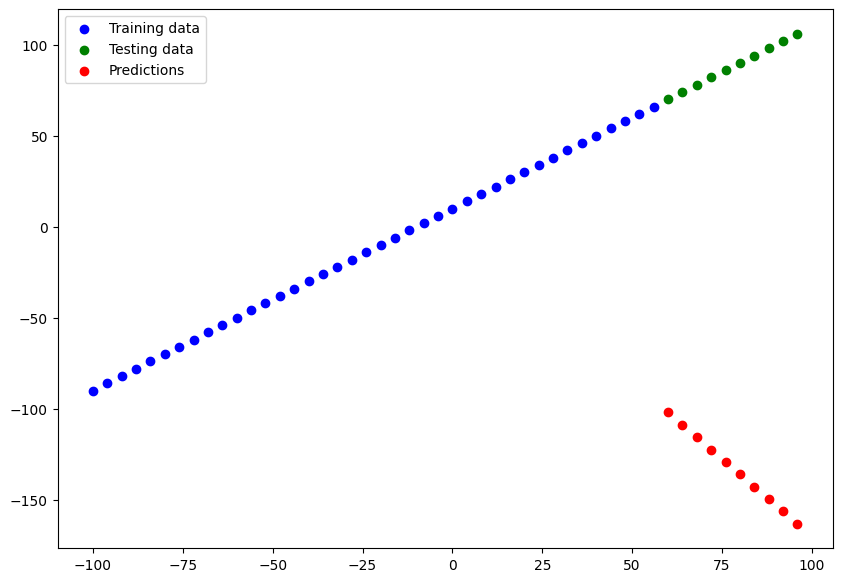

In [50]:
#4.Predict from the model
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [51]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[-101.981926],
        [-108.78072 ],
        [-115.57952 ],
        [-122.37831 ],
        [-129.17711 ],
        [-135.9759  ],
        [-142.7747  ],
        [-149.5735  ],
        [-156.37228 ],
        [-163.17108 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-101.981926, -108.78072 , -115.57952 , -122.37831 , -129.17711 ,
        -135.9759  , -142.7747  , -149.5735  , -156.37228 , -163.17108 ],
       dtype=float32)>)

In [52]:
#5. Evaluate the prediction for model 1

mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=49616.062>)

**Build Model_2**
  * 2 dense layers, trained for 100 epochs

  

In [53]:
#Model_2

#Set the random seed
tf.random.set_seed(42)

# Build model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# 3. Fit the model

model_2.fit(X_train, y_train, epochs = 100)


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 51.9581 - mae: 51.9581
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 36.8848 - mae: 36.8848
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 40.9681 - mae: 40.9681
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 26.5844 - mae: 26.5844
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5779 - mae: 14.5779
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6603 - mae: 11.6603
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7495 - mae: 12.7495
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1042 - mae: 11.1042
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.2744 - mae: 40.2744
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.6935 - mae: 27.6935
Epoch 11/100
2/2 [==============================] - 0s 8ms

1/1 [==============================] - 0s 86ms/step


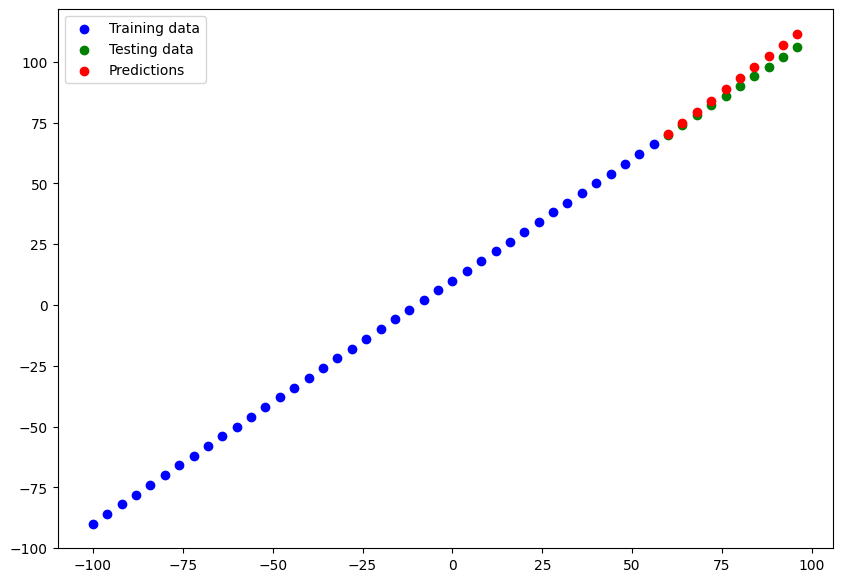

In [54]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model2 Evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([444.50146, 303.7043 , 204.75203, 147.64494, 132.38284, 158.96591,
        227.39397, 337.667  , 489.78564, 683.7495 ], dtype=float32)>)

**Build Model 3**

2 layers, trained for 500 epochs

In [56]:
# Build Model 3

#Set the seeds to 42
tf.random.set_seed(42)

#1. Create the model3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =[1]),
    tf.keras.layers.Dense(1)])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"])

#3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)




Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 40.8828 - mae: 40.8828
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 31.2147 - mae: 31.2147
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 35.0592 - mae: 35.0592
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 22.7084 - mae: 22.7084
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 13.6597 - mae: 13.6597
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0467 - mae: 11.0467
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.0896 - mae: 12.0896
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.9385 - mae: 10.9385
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 38.1487 - mae: 38.1487
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 25.7151 - mae: 25.7151
Epoch 11/500
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 99ms/step


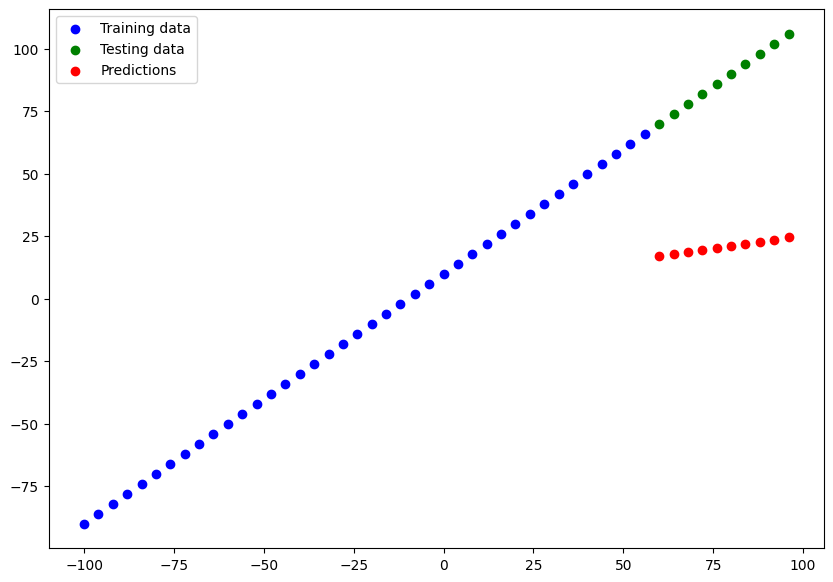

In [57]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [58]:
# Evaluation of model3
mae_3 =mae(y_test, y_preds_3)
mse_3 =mse( y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([5169.93  , 5052.0713, 4935.607 , 4820.539 , 4706.8657, 4594.587 ,
        4483.703 , 4374.2144, 4266.1206, 4159.422 ], dtype=float32)>)

**Compare the model Results of Experiments**

  * We have run few models and evaluated them so let's compare the predictions
  * When u build the models, make sure to start small and gradually increase the complexity
  *

In [59]:
# Let's compare the models results using the pandas DataFrame

import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,0,49616.0625
1,model_2,0,"[444.50146, 303.7043, 204.75203, 147.64494, 13..."
2,model_3,0,"[5169.93, 5052.0713, 4935.607, 4820.539, 4706...."


In [60]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Tracking the experiments**



*   One really good habit in machine learning modeling is to track the results of your experiments
*   And when doing so, it can be tedious if you are running lot's of experiments

*   Luckly there are toold to help us

*   Resource : As u build more models' ypu will want to look into using

TensorBoard : A component of the TensorFlow library to help track modelling experiments (we'll see this one later)

Weights and Biases - A tool for tracking all of kinds of machine learning experiments (Plugs strait into TensorBoard)




**Saving the model**

1.   Saving the models allows us to use them outside of the colab
2.   We can use them in the websites and mobile applications

**There are 2 formats to save the models:**
1. SavedModel Format
2. HDF5 format


In [61]:
# Save the model using the SavedModel Format

model_2.save("best_model_SavedModel_format")

In [62]:
#Save the model using HDF5 format

model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Loading the model back to Colab**

In [63]:
#Loading in a saved model
loaded_Saved_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_Saved_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


If the above 2 summaries are same then your model saved in a right way,


**Compare model_2 predictions with the savedmodel format model predictions**

In [65]:
#Compare model_2 predictions with the savedmodel format model predictions

model_2_preds = model_2.predict(X_test)
loaded_Saved_format_preds = loaded_Saved_format.predict(X_test)
model_2_preds == loaded_Saved_format_preds # If the output returns true then it means our model is working perfectly



1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
# Now let's load in the model using the .h5 format

loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()
model_2.summary() # if 2 summaries are equal then it means our model loaded perfectly



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                              

In [72]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds # All should return the true

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

**How to download a model or any other file from the google colab**

*  If you want to download your files from the colab then

    1 You can go to files and right click on the file and click on download.

    2 Use code (As below)

    3 You can save it to the google drive or Git Hub
    

In [73]:
#Download a file from the Google colab

from google.colab import files

files.download("/content/best_model_HDF5_format.h5") # now this file will be downloaded to our local machine


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# Save a file from google Colab to Google Drive (Requires mounting the google drive)

!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/ML_models

In [75]:
!ls /content/drive/MyDrive/ML_models # list the model files in this folder, and there should be our .h5 file

best_model_HDF5_format.h5


**A Larger Example**



In [77]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# Read in the insurance datatset
#I am giving the gitHub link

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance # 1338 rows × 7 columns should be printed


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

**one hot coding :** A categorical feature becomes an array whole size is the number of possible choices for that features.
  * Convert a categorical variable into dummy/indicator variables




In [83]:
# Let's try one-hot encode our DataFrame so it's all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#Create Features and Labels

# Create Training and Test Sets (Kind of model2)
# Build Nueral Network



In [86]:
#Create Features and Labels

X = insurance_one_hot.drop("charges", axis =1)
y= insurance_one_hot["charges"]

In [90]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [88]:
#View y
y.head

<bound method NDFrame.head of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [91]:
# Create Training and Test Sets (Kind of model2)
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # this function splits the data for Testing and Training
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [93]:
X_train # All indexes should be randomly shuffeled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [110]:
# Build a neural network (Sort of like model_2)

tf.random.set_seed(42)

# Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
#Fit the model
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8652.8672 - mae: 8652.8672
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7881.5132 - mae: 7881.5132
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.7158 - mae: 7595.7158
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7676.6421 - mae: 7676.6421
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7672.5581 - mae: 7672.5581
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7614.6821 - mae: 7614.6821
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7575.3784 - mae: 7575.3784
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7806.6030 - mae: 7806.6030
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.2344 - mae: 7493.2344
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7761.0396 - mae: 7761.0396

In [111]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7658.3320 - mae: 7658.3320


[7658.33203125, 7658.33203125]

**Let's build insurance_model_2**
  * We will Try 3 things here
    * Increasing the number of layers from 2 to 3
    * Increasing the number of units in each layer except in output layer
    * Changing the optimizer from SGD to Adam

  * Everything else would remain same as usual

In [113]:
#Set Random seed to 42
tf.random.set_seed(42)

#Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mse,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#Fit the model
insurance_model_2.fit(X_train,y_train, epochs=100, verbose =0)


In [114]:
# Ealuate the model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 65518232.0000 - mae: 6195.5986


[65518232.0, 6195.5986328125]

In [115]:
#Evaluate the first model we built for this and check the improvement
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7658.3320 - mae: 7658.3320


[7658.33203125, 7658.33203125]

**Insurance Model_3**

In [125]:
# Set the seed
tf.random.set_seed(42)

#Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(),
                             metrics = ["mae"])

#Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13313.9795 - mae: 13313.9795
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13156.0137 - mae: 13156.0137
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12821.6084 - mae: 12821.6084
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12158.1514 - mae: 12158.1514
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11038.7451 - mae: 11038.7451
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9591.4658 - mae: 9591.4658
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8242.8701 - mae: 8242.8701
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7562.2085 - mae: 7562.2085
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7443.6528 - mae: 7443.6528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7422.1372 - mae:

In [126]:
#Evaluate the model_3 we built

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3495.0808 - mae: 3495.0808


[3495.080810546875, 3495.080810546875]

In [127]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7658.3320 - mae: 7658.3320


[7658.33203125, 7658.33203125]

Text(0.5, 0, 'epochs')

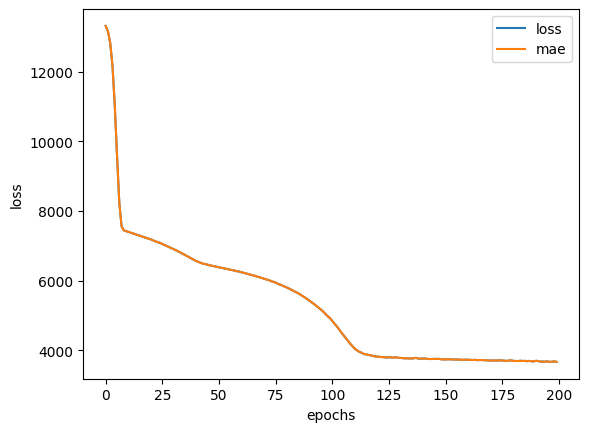

In [128]:
# Plot the history (Also known as a loss corve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**How much time you should Train**

IT DEPENDS : But there is an option called EarlyStopping callback, which is a component of the TensorFlow, Which will stop the training when the improvement of the model decreases at some point of time

**Preprocessing data (Normalization and standardization)**

Normalization : is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numaric columns in the dataset to a common scale, without distorting differences in the ranges of values.
x
* In terms od scalling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better


In [129]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

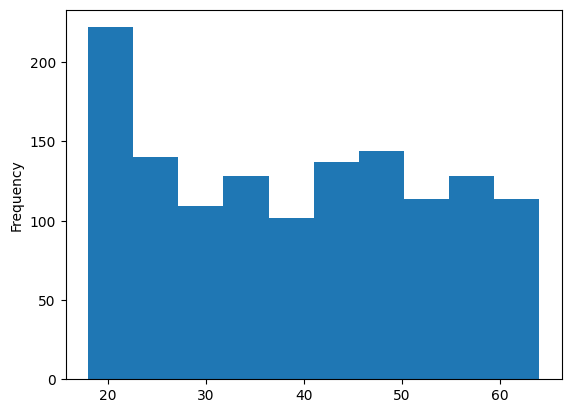

In [133]:
X["age"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

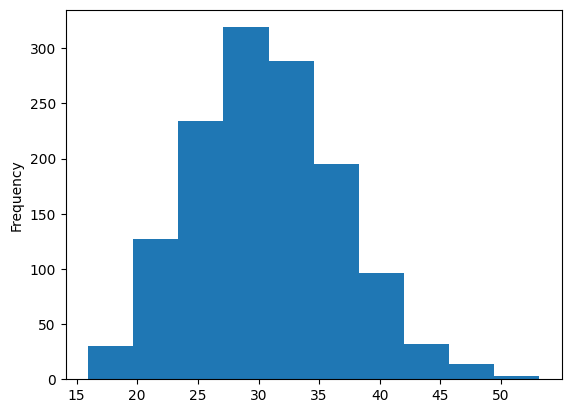

In [134]:
X["bmi"].plot(kind="hist")

In [135]:
X["children"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>

**Preprocessing data (Normalization and standardization)**

Normalization : is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numaric columns in the dataset to a common scale, without distorting differences in the ranges of values.
x
* In terms od scalling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance scv file
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**To prepare our data, we can borrow few classes from Scikit-Learn**



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer